In [83]:
#import libraries
import pandas as pd 
import numpy as np
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [5]:
data_path = rf"C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data"
train_data_path = rf"C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Train"
test_data_path = rf"C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test"

In [99]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [6]:
#checking for the number of labels
numbers = len(os.listdir(train_data_path))
print(numbers)

43


In [70]:
#load the training data
train_labels = []
train_images = []

for i in range (42):
    path = data_path + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
          print(path + '/' + img)
          image = cv2.imread(path + '/' + img) 
          image = cv2.resize(image, (30, 30))
          image = image/255
          train_images.append(image.reshape(30, 30, 3))
          train_labels.append(i)
        
        except:
           print("Error in " + img)
            

C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00000.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00001.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00002.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00003.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00004.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00005.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00006.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00007.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00008.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00009.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data/Train/0/00000_00000_00010.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign dat

In [72]:
#convert the data into numpy array for the training
train_labels = np.array(train_labels)
train_images = np.array(train_images)

In [73]:
#checking the shape of the data
print(f" train images shape: ", train_images.shape)
print(f"train labels shape: ", train_labels.shape)

 train images shape:  (38969, 30, 30, 3)
train labels shape:  (38969,)


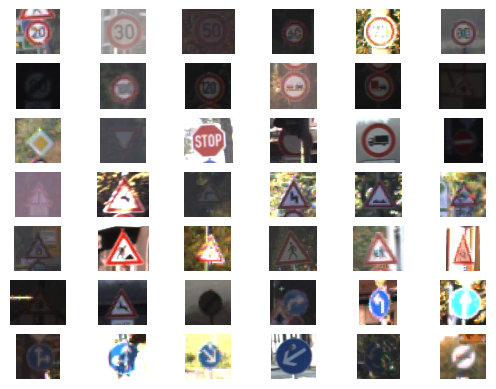

In [9]:
#visualizing first image from each category
from matplotlib.image import imread

for i in range(42):
    images_files = os.listdir(train_data_path + '/' + str(i))
    for img in images_files:
        plt.subplot(7, 6, i+1)
        img_path = os.path.join(train_data_path + '/' + str(i) + '/' + img)
        image = imread(img_path)
        plt.imshow(image)
        plt.grid(False)
        plt.axis('off')
        break

In [74]:
#load the test data
test_csv = pd.read_csv(rf"C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test.csv")

test_labels = test_csv['ClassId'].values

test_images = []
for img in os.listdir(test_data_path):
        path = os.path.join(test_data_path, img)
        print(path)
        test_image = cv2.imread(path)
        if test_image is None:
                print('image is none')
                continue
        test_image = cv2.resize(test_image, (30, 30))
        test_image = test_image/255
        test_image = test_image.reshape(30, 30, 3)
        test_images.append(test_image)


C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00000.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00001.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00002.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00003.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00004.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00005.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00006.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00007.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00008.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00009.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00010.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00011.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00012.png
C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00013.png
C:\Use

In [75]:
#convert test data into numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [76]:
print(f'test labels shape: ',test_labels.shape)
print(f'test images shape', test_images.shape)

test labels shape:  (12630,)
test images shape (12630, 30, 30, 3)


In [78]:
#split the model in train and validation split
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [79]:
#checking the shape of the train and validation set
print(y_train.shape)
print(y_val.shape)

(31175,)
(7794,)


In [80]:
#build the model
model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape = (30, 30, 3)),
    Conv2D(filters = 32, kernel_size= (3,3), activation= 'relu', input_shape = (30, 30, 3)),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(axis = 1),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = (30, 30, 3)),
    Conv2D(filters = 128, kernel_size= (3,3), activation= 'relu', input_shape = (30, 30, 3)),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(axis = 1),
    Flatten(),
    Dense(units=512, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),
    Dense(units=43, activation='softmax')
])

model.compile(optimizer = 'adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(x_train, y_train, callbacks = [early_stop], validation_data= (x_val, y_val), batch_size = 32, epochs = 30)

c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 51s 47ms/step - accuracy: 0.7501 - loss: 1.0050 - val_accuracy: 0.9832 - val_loss: 0.0633
Epoch 2/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9846 - loss: 0.0583 - val_accuracy: 0.9900 - val_loss: 0.0378
Epoch 3/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.9938 - loss: 0.0253 - val_accuracy: 0.9905 - val_loss: 0.0311
Epoch 4/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9926 - loss: 0.0277 - val_accuracy: 0.9932 - val_loss: 0.0241
Epoch 5/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9931 - loss: 0.0221 - val_accuracy: 0.9870 - val_loss: 0.0394
Epoch 6/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9932 - loss: 0.0233 - val_accuracy: 0.9905 - val_loss: 0.0351
Epoch 7/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.9930 - loss: 0.0254 - val_accuracy: 0.9887 - val_loss: 0.0498


In [81]:
#evaluating the model on the training dataset
loss, accuracy = model.evaluate(train_images, train_labels)

print(f'loss: ', loss)
print(f'accuracy', accuracy)

1218/1218 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9949 - loss: 0.0183
loss:  0.013584429398179054
accuracy 0.9963560700416565


In [82]:
#evaluating the model on the testing data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Loss: ', loss)
print(f'Accuracy: ', accuracy)

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9611 - loss: 0.2074
Loss:  0.2109605222940445
Accuracy:  0.9623119831085205


1218/1218 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step


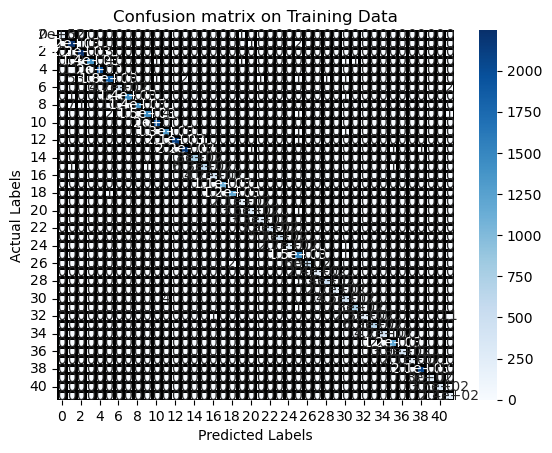

In [84]:
#confusion matrix on the training dataset

train_prediction = model.predict(train_images)
train_cm = confusion_matrix(train_labels, train_prediction.argmax(axis = 1))
plt.Figure(figsize= (7, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion matrix on Training Data')
plt.show()

In [88]:
print(test_images.shape)
print(test_labels.shape)

(12630, 30, 30, 3)
(12630,)


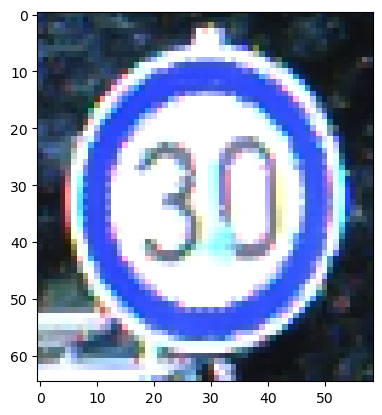

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Speed limit (30km/h)


In [105]:
#test the model by giving the manual input

img = cv2.imread(rf"C:\Users\Wahaj Sajid\Desktop\Datasets\traffic sign data\Test\00024.png")
plt.imshow(img, cmap='gray')
plt.show()
img = cv2.resize(img, (30, 30))
img = img/255
img = img.reshape(30, 30, 3)

img = np.expand_dims(img, axis = 0)

prediction = model.predict(img)

predicted_label = np.argmax(prediction, axis=1)[0]

if predicted_label in classes:
    print(classes[predicted_label])


